In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [53]:
FILE_NAME = '../project/mix_abalone_train.csv'

In [54]:
abalone_train = pd.read_csv(FILE_NAME)
abalone_train.shape

(94792, 9)

In [55]:
with open('unique.csv', mode = 'w') as f:

    for i in range(len(abalone_train.columns)):
        f.write(f'{abalone_train.columns[i]}, {abalone_train.iloc[:,i].unique()} \n')

In [56]:
abalone_train.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [57]:
abalone_train.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


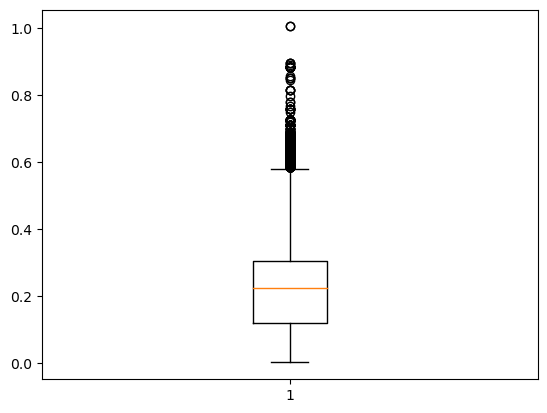

In [58]:
plt.boxplot(abalone_train['Shell_weight'])
plt.show()

In [59]:
abalone_train['Shell_weight'].describe()

count    94792.000000
mean         0.226468
std          0.130639
min          0.001500
25%          0.120000
50%          0.225000
75%          0.305000
max          1.005000
Name: Shell_weight, dtype: float64

In [60]:
abalone_train = abalone_train[abalone_train['Height'] != 0.].copy()
abalone_train.reset_index(inplace=True, drop=True)
abalone_train.shape

(94784, 9)

In [61]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [62]:
abalone_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [63]:
abalone_train = pd.get_dummies(abalone_train)

In [64]:
abalone_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [65]:
abalone_train.replace(True, 1, inplace = True)
abalone_train.replace(False, 0, inplace = True)

In [66]:
abalone_train['Rings'] = abalone_train['Rings'] + 1.5

In [67]:
abalone_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


In [68]:
abalone_train[:3] = np.square(abalone_train[:3])
abalone_train[3:7] = np.log(abalone_train[3:7] + 1)

In [69]:
abalone_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600,156.250000,1.0,0.000000,0.000000
1,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400,156.250000,1.0,0.000000,0.000000
2,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025,56.250000,0.0,1.000000,0.000000
3,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144,2.525729,0.0,0.000000,0.693147
4,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236,2.442347,0.0,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000,12.500000,1.0,0.000000,0.000000
94780,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500,11.500000,0.0,0.000000,1.000000
94781,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000,10.500000,0.0,0.000000,1.000000
94782,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000,11.500000,1.0,0.000000,0.000000


In [70]:
feature_df = abalone_train[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone_train['Rings']

In [71]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.000000,0.000000,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600
1,1.0,0.000000,0.000000,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400
2,0.0,1.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
3,0.0,0.000000,0.693147,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144
4,0.0,0.693147,0.000000,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236
...,...,...,...,...,...,...,...,...,...,...
94779,1.0,0.000000,0.000000,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000
94780,0.0,0.000000,1.000000,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500
94781,0.0,0.000000,1.000000,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000
94782,1.0,0.000000,0.000000,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000


In [72]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293316,0.363233,0.343438,0.517402,0.401952,0.135651,0.790815,0.341606,0.169918,0.226464
std,0.455282,0.480931,0.474854,0.118314,0.098093,0.038178,0.459229,0.205267,0.101333,0.130642
min,0.000000,0.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
25%,0.000000,0.000000,0.000000,0.445000,0.345000,0.110000,0.419500,0.177500,0.086875,0.120000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000
75%,1.000000,1.000000,1.000000,0.600000,0.470000,0.160000,1.072500,0.464500,0.233000,0.305000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [73]:
target_sr.describe()

count    94784.000000
mean        11.210597
std          3.251593
min          2.442347
25%          9.500000
50%         10.500000
75%         12.500000
max        156.250000
Name: Rings, dtype: float64

## [2] test, train 분리

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df,target_sr, test_size=0.2, random_state=12)

In [75]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [77]:
scaler.min_, scaler.data_min_

(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.24296934e-02,
        -1.89684904e-02, -5.53403431e-04, -1.56102934e-04, -2.03297144e-05,
        -1.18422455e-05, -2.48762407e-05]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 2.560e-02, 1.210e-02, 6.250e-04,
        4.410e-04, 3.025e-05, 9.000e-06, 2.500e-05]))

In [78]:
scaler.scale_, scaler.data_max_ 

(array([1.        , 1.        , 1.        , 1.2667849 , 1.56764383,
        0.88544549, 0.35397491, 0.67205667, 1.31580506, 0.99504963]),
 array([1.    , 1.    , 1.    , 0.815 , 0.65  , 1.13  , 2.8255, 1.488 ,
        0.76  , 1.005 ]))

In [79]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.shape

(75827, 10)

In [80]:
x_train_scaled.min(), x_train_scaled.max()

(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [81]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.shape

(18957, 10)

In [82]:
x_test_scaled.min(), x_test_scaled.max()

(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.132252
 Diameter          0.075090
 Height            0.002988
 Whole_weight      0.002145
 Shucked_weight    0.000652
 Viscera_weight    0.000646
 Shell_weight      0.001766
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.980998
 Diameter          0.968647
 Height            0.455451
 Whole_weight      1.000000
 Shucked_weight    0.842067
 Viscera_weight    1.000000
 Shell_weight      0.892535
 dtype: float64)

## [3_1] 앙상블 - Voting

In [83]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [84]:
k_model = KNeighborsRegressor()
l_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state= 12)

In [85]:
v_model = VotingRegressor(estimators=[('k_model', k_model), ('dt_model',dt_model) ,('l_model',l_model)]) 

In [86]:
# 학습 진행 
v_model.fit(x_train_scaled, y_train) 

VotingRegressor(estimators=[('k_model', KNeighborsRegressor()),
                            ('dt_model',
                             DecisionTreeRegressor(random_state=12)),
                            ('l_model', LinearRegression())])

In [87]:
# 성능 확인 
train_score = v_model.score(x_train_scaled,y_train )
test_score = v_model.score(x_test_scaled, y_test)

print(f'train_score : test_score = {train_score} : {test_score}')


train_score : test_score = 0.8576286769340461 : 0.5459655052312599


## [3-1_1] 튜닝

In [88]:
from sklearn.ensemble import ExtraTreesRegressor

In [89]:
params = {'max_depth' : range(5,20), 
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson']}

In [90]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)

In [91]:
search_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

## [3_2] 앙상블 - Bagging

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
lf_model = RandomForestRegressor(random_state=12, oob_score= True)
lf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(oob_score=True, random_state=12)

In [94]:
print(f'feature_names_in_ : {lf_model.feature_names_in_}')
print(f'n_features_in_ : {lf_model.n_features_in_}개')
print(f'feature_importances_ : {lf_model.feature_importances_}')

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Whole_weight'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [0.00488853 0.00758281 0.00460038 0.04130023 0.03819143 0.06518317
 0.07479387 0.14589142 0.0642384  0.55332977]


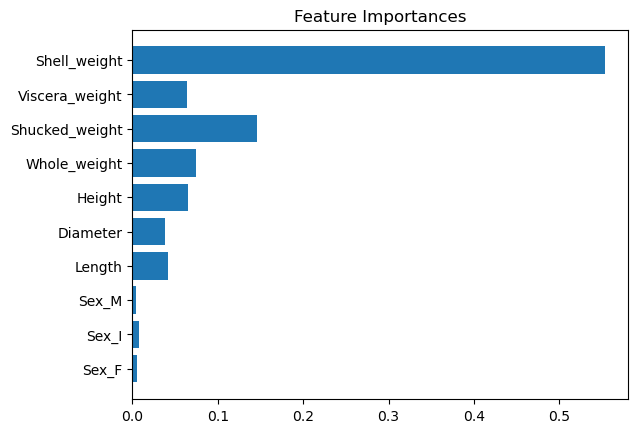

In [96]:
plt.barh(range(lf_model.n_features_in_), lf_model.feature_importances_)
plt.yticks(range(lf_model.n_features_in_), lf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

In [97]:
print(f'oob_score_ : {lf_model.oob_score_}')

oob_score_ : 0.6229978310438558


In [98]:
train_score = lf_model.score(x_train_scaled, y_train)
test_score = lf_model.score(x_test_scaled, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9470876346412904, test_score : 0.5801329270811514


## [3-2_1] 튜닝

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [100]:
params = {'max_depth' : range(5,20), 
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson']}

In [101]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)

In [102]:
search_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [103]:
search_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=17, min_samples_leaf=2;, score=0.644 total time=   8.1s
[CV 2/5] END criterion=squared_error, max_depth=17, min_samples_leaf=2;, score=0.655 total time=   8.8s
[CV 3/5] END criterion=squared_error, max_depth=17, min_samples_leaf=2;, score=0.644 total time=   7.9s
[CV 4/5] END criterion=squared_error, max_depth=17, min_samples_leaf=2;, score=0.654 total time=   8.0s
[CV 5/5] END criterion=squared_error, max_depth=17, min_samples_leaf=2;, score=0.571 total time=   8.5s
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=2;, score=0.599 total time=   2.7s
[CV 2/5] END criterion=squared_error, max_depth=8, min_samples_leaf=2;, score=0.612 total time=   3.2s
[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=2;, score=0.594 total time=   3.2s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=2;, score=0.608 total time=   3.0s
[CV 5/

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(2, 5)},
                   verbose=4)

In [104]:
print(f'[search_cv.best_score_] {search_cv.best_score_}')
print(f'[search_cv.best_param] {search_cv.best_params_}')
print(f'[search_cv.best_estimator_] {search_cv.best_estimator_}')

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df

[search_cv.best_score_] 0.6346113544086824
[search_cv.best_param] {'min_samples_leaf': 3, 'max_depth': 19, 'criterion': 'squared_error'}
[search_cv.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=19, min_samples_leaf=3,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.099289,0.336058,0.283201,0.003042,2,17,squared_error,"{'min_samples_leaf': 2, 'max_depth': 17, 'crit...",0.643790,0.654973,0.644434,0.653566,0.570806,0.633514,0.031685,13
1,2.988415,0.194998,0.156028,0.016511,2,8,squared_error,"{'min_samples_leaf': 2, 'max_depth': 8, 'crite...",0.599081,0.612094,0.593544,0.607623,0.533167,0.589102,0.028704,38
2,2.397344,0.085616,0.091489,0.003907,2,5,poisson,"{'min_samples_leaf': 2, 'max_depth': 5, 'crite...",0.528751,0.537411,0.515902,0.530530,0.469387,0.516396,0.024512,50
3,12.621367,0.093337,0.463673,0.056283,2,18,squared_error,"{'min_samples_leaf': 2, 'max_depth': 18, 'crit...",0.644629,0.655777,0.645199,0.653331,0.573076,0.634402,0.030975,5
4,10.811404,0.499233,0.351041,0.043599,4,18,poisson,"{'min_samples_leaf': 4, 'max_depth': 18, 'crit...",0.645507,0.657440,0.644829,0.655069,0.569961,0.634561,0.032688,2
5,11.649800,0.219653,0.417557,0.028453,3,19,squared_error,"{'min_samples_leaf': 3, 'max_depth': 19, 'crit...",0.644765,0.657727,0.644657,0.655531,0.570377,0.634611,0.032564,1
6,4.578869,0.084565,0.203832,0.011206,3,11,squared_error,"{'min_samples_leaf': 3, 'max_depth': 11, 'crit...",0.630167,0.640714,0.626645,0.639680,0.559104,0.619262,0.030560,29
7,4.584568,0.810360,0.169213,0.012340,2,11,poisson,"{'min_samples_leaf': 2, 'max_depth': 11, 'crit...",0.629020,0.638859,0.625840,0.639052,0.557932,0.618141,0.030559,32
8,4.394365,0.066787,0.198772,0.016344,3,13,squared_error,"{'min_samples_leaf': 3, 'max_depth': 13, 'crit...",0.637372,0.649754,0.635234,0.647171,0.565659,0.627038,0.031186,25
9,5.695965,0.024445,0.236517,0.012161,3,15,squared_error,"{'min_samples_leaf': 3, 'max_depth': 15, 'crit...",0.642936,0.652667,0.641038,0.652075,0.569788,0.631701,0.031309,21


In [105]:
search_cv.best_estimator_.score(x_test_scaled,y_test )

0.596521857199426

In [106]:
params = {'max_depth' : range(5,20),
          'min_samples_leaf' : range(5,15),
          'criterion' : ['squared_error','poisson']}

In [107]:
rf_model_u = ExtraTreesRegressor(random_state=12, oob_score=True,bootstrap=True)

In [108]:
search_cv_u = RandomizedSearchCV(rf_model_u, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [109]:
search_cv_u.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=7, min_samples_leaf=6;, score=0.581 total time=   2.6s
[CV 2/5] END criterion=squared_error, max_depth=7, min_samples_leaf=6;, score=0.594 total time=   2.7s
[CV 3/5] END criterion=squared_error, max_depth=7, min_samples_leaf=6;, score=0.575 total time=   2.6s
[CV 4/5] END criterion=squared_error, max_depth=7, min_samples_leaf=6;, score=0.589 total time=   2.5s
[CV 5/5] END criterion=squared_error, max_depth=7, min_samples_leaf=6;, score=0.517 total time=   2.5s
[CV 1/5] END criterion=poisson, max_depth=12, min_samples_leaf=7;, score=0.634 total time=   5.6s
[CV 2/5] END criterion=poisson, max_depth=12, min_samples_leaf=7;, score=0.645 total time=   5.6s
[CV 3/5] END criterion=poisson, max_depth=12, min_samples_leaf=7;, score=0.630 total time=   5.5s
[CV 4/5] END criterion=poisson, max_depth=12, min_samples_leaf=7;, score=0.644 total time=   5.6s
[CV 5/5] END criterion=poisson,

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(5, 15)},
                   verbose=4)

In [112]:
print(f'[search_cv_u.best_score_] {search_cv_u.best_score_}')
print(f'[search_cv_u.best_param] {search_cv_u.best_params_}')
print(f'[search_cv_u.best_estimator_] {search_cv_u.best_estimator_}')

cv_result_df_u = pd.DataFrame(search_cv_u.cv_results_)
cv_result_df_u

[search_cv_u.best_score_] 0.6329084857401441
[search_cv_u.best_param] {'min_samples_leaf': 6, 'max_depth': 18, 'criterion': 'poisson'}
[search_cv_u.best_estimator_] ExtraTreesRegressor(bootstrap=True, criterion='poisson', max_depth=18,
                    min_samples_leaf=6, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.554321,0.070093,0.121905,0.007079,6,7,squared_error,"{'min_samples_leaf': 6, 'max_depth': 7, 'crite...",0.581475,0.593816,0.574681,0.588958,0.517054,0.571197,0.027843,40
1,5.506563,0.102376,0.223141,0.012434,7,12,poisson,"{'min_samples_leaf': 7, 'max_depth': 12, 'crit...",0.633526,0.644500,0.629715,0.644164,0.560011,0.622383,0.031723,27
2,3.962168,0.073428,0.203454,0.017238,14,11,squared_error,"{'min_samples_leaf': 14, 'max_depth': 11, 'cri...",0.626958,0.638870,0.624103,0.638863,0.555910,0.616941,0.031106,31
3,2.871861,0.502534,0.117197,0.008799,14,8,poisson,"{'min_samples_leaf': 14, 'max_depth': 8, 'crit...",0.598792,0.611250,0.592600,0.611451,0.531033,0.589025,0.029893,39
4,5.605661,0.254536,0.229487,0.010764,10,17,poisson,"{'min_samples_leaf': 10, 'max_depth': 17, 'cri...",0.640949,0.651817,0.638916,0.651065,0.565879,0.629725,0.032343,9
5,5.435513,0.554691,0.248870,0.012402,10,16,squared_error,"{'min_samples_leaf': 10, 'max_depth': 16, 'cri...",0.641091,0.651794,0.638123,0.650234,0.564787,0.629206,0.032628,13
6,2.917875,0.018791,0.179677,0.069155,14,8,squared_error,"{'min_samples_leaf': 14, 'max_depth': 8, 'crit...",0.599590,0.613260,0.596506,0.611637,0.531103,0.590419,0.030369,36
7,2.293195,0.041349,0.089667,0.010203,12,5,poisson,"{'min_samples_leaf': 12, 'max_depth': 5, 'crit...",0.530554,0.538403,0.514843,0.533242,0.468067,0.517022,0.025709,48
8,4.159277,0.057854,0.199888,0.003620,7,11,squared_error,"{'min_samples_leaf': 7, 'max_depth': 11, 'crit...",0.628530,0.640227,0.623796,0.639494,0.556574,0.617724,0.031220,30
9,6.504961,0.795535,0.247843,0.027404,11,17,poisson,"{'min_samples_leaf': 11, 'max_depth': 17, 'cri...",0.640831,0.652201,0.637133,0.650845,0.565439,0.629290,0.032438,12


In [114]:
search_cv_u.best_estimator_.score(x_test_scaled,y_test )

0.589606586487929